In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Point : Visualization is important

In [2]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

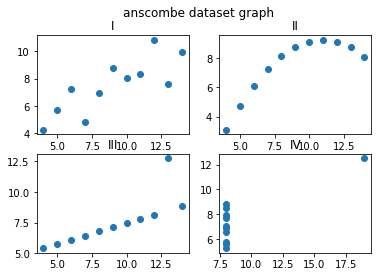

In [4]:
ans = dict()
ax = list()

fig = plt.figure()

fig.suptitle('anscombe dataset graph')

for i, key in enumerate(['I', 'II', 'III', 'IV']):
    ans[key] = anscombe[anscombe['dataset'] == key]
    ax.append(fig.add_subplot(2, 2, i+1))
    ax[i].plot(ans[key]['x'], ans[key]['y'], 'o')
    ax[i].set_title(key)

## Playing with matplotlib

### Single variable graph

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

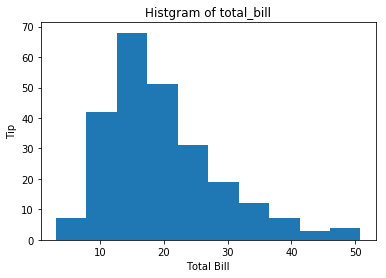

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Histgram of total_bill')

ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.hist(tips['total_bill'])

Text(0, 0.5, 'tip')

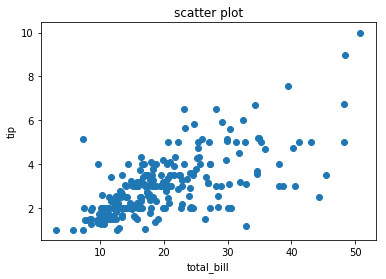

In [7]:
scat = plt.figure()
ax = scat.add_subplot(1,1,1)
ax.set_title('scatter plot')
ax.scatter(tips['total_bill'], tips['tip'])
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6770f39b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6770f47208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6770f399e8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6770f47898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6770f47be0>,
 'means': []}

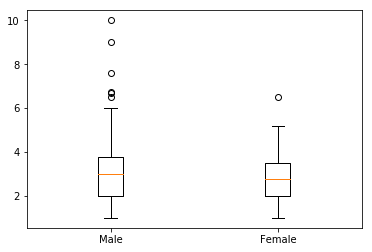

In [8]:
box = plt.figure()
ax = box.add_subplot(1,1,1)

male_tip = tips[tips['sex'] == 'Male']['tip']
female_tip = tips[tips['sex'] == 'Female']['tip']

ax.boxplot([male_tip, female_tip], labels=['Male', 'Female'])

### Multivariable Graph

In [9]:
encode_sex = lambda sex: 0 if sex == 'Male' else (1 if sex == 'Female' else 2)
print(encode_sex('Male'))
print(encode_sex('Female'))
print(encode_sex('Other'))

0
1
2


In [10]:
tips['sex_enc'] = tips['sex'].apply(encode_sex)

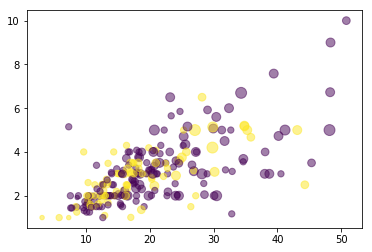

In [35]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(tips['total_bill'], tips['tip'], c = tips['sex_enc'], s = tips['size'] * 20, alpha = 0.5)

## Playing with seaborn

Text(0, 0.5, 'probability')

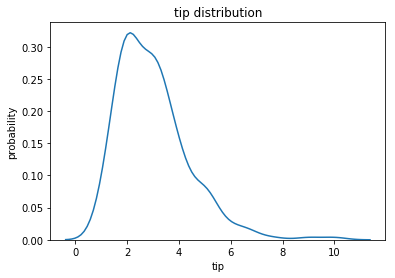

In [21]:
ax = plt.subplots()
ax = sns.distplot(tips['tip'], hist=False)
ax.set_title('tip distribution')
ax.set_xlabel('tip')
ax.set_ylabel('probability')

Text(0, 0.5, 'number of cases')

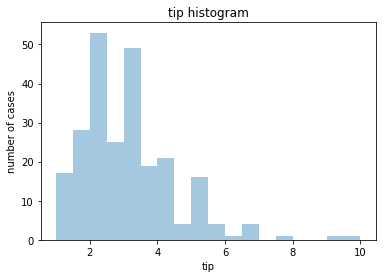

In [23]:
ax = sns.distplot(tips['tip'], kde=False)
ax.set_title('tip histogram')
ax.set_ylabel('number of cases')